In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
CrimeData = pd.read_csv('crime_data.csv')

In [3]:
CrimeData.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA

In [4]:
crime_df = CrimeData.copy()

In [5]:
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime_df = crime_df.drop('Unnamed: 0', axis=1)

In [7]:
crime_df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
crime_df[crime_df.duplicated()].shape

(0, 4)

### Hierarchical Clustering

In [10]:
# Normalization Function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
# Normalized data frame(Considering the numerical part of data)
df_norm= norm_func(crime_df.iloc[:,0:])

In [12]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

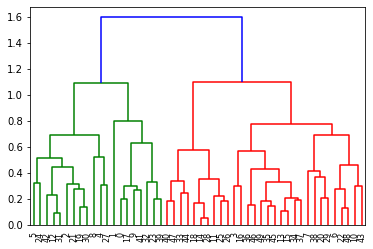

In [17]:
dendrogram =sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [18]:
hc=AgglomerativeClustering(n_clusters=3, affinity ='euclidean', linkage='single')

In [19]:
y_hc =hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns =['Clusters'])

In [20]:
df_norm['h_clusterid']= hc.labels_

In [21]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,0


In [22]:
df_norm.groupby('h_clusterid').agg('mean')

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,0.408635,0.412386,0.569562,0.341731
1,0.554217,0.746575,0.271186,0.961240
2,0.879518,0.993151,0.813559,0.635659


In [23]:
df_norm.groupby('h_clusterid').agg('count')

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,48,48,48,48
1,1,1,1,1
2,1,1,1,1


### KMeans Clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
CrimeData.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
crime_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_crime = scaler.fit_transform(crime_df.iloc[:,0:])

In [28]:
scaler_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


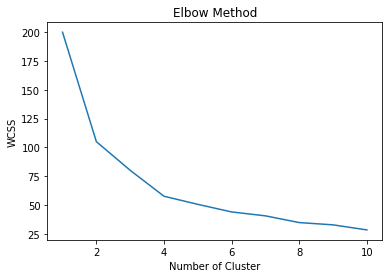

In [29]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaler_crime)
    WCSS.append(kmeans.inertia_)
    
    
plt.plot(range(1,11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Build the Algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaler_crime)

KMeans(n_clusters=3, random_state=42)

In [31]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [32]:
crime_df['clusterid_new'] = clusters_new.labels_

In [33]:
crime_df

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [34]:
crime_df.groupby('clusterid_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid_new,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


In [35]:
crime_df.groupby('clusterid_new').agg(['count'])

,Murder,Assault,UrbanPop,Rape
,count,count,count,count
clusterid_new,,,,
0,16,16,16,16
1,20,20,20,20
2,14,14,14,14


#### We will select KMeans Clustring since in hierarchical clustering all data is gathered in one cluster.